<a href="https://colab.research.google.com/github/aashrithresearch/brain-tumor/blob/main/braintumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
from fastai.callback.fp16 import *
import os
import torch
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/archive (1)'

In [4]:
print(os.listdir(path+'/Training'))

['no tumor', 'glioma tumor', 'meningioma tumor', 'pituitary tumor']


In [5]:
tumors = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(seed=40),
                   get_y=parent_label,
                   item_tfms=Resize(440),
                   batch_tfms=aug_transforms(size=224, min_scale=0.5))
dls = tumors.dataloaders(path+'/Training')

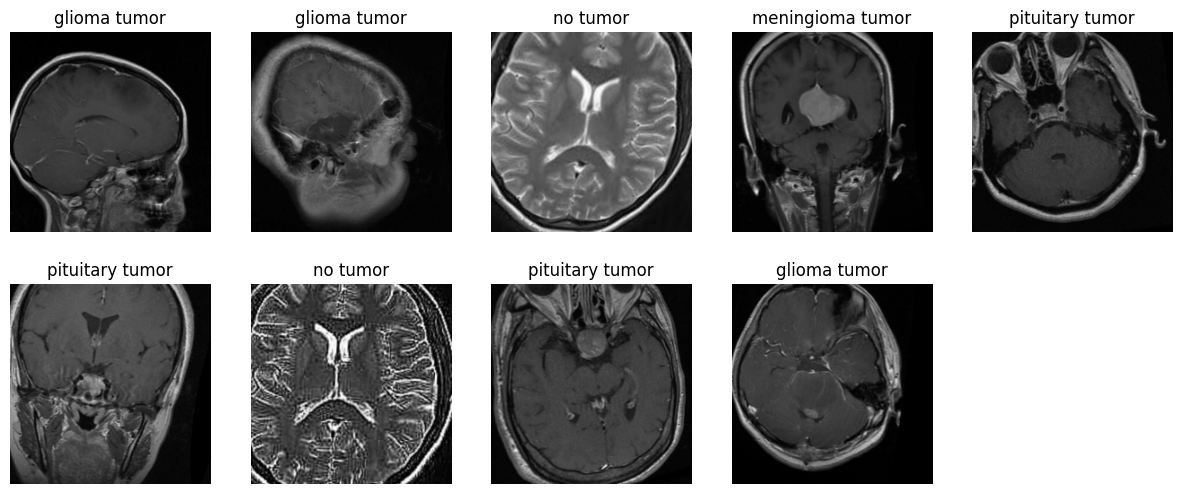

In [6]:
dls.show_batch(nrows=2, ncols=5)

In [7]:
learn = vision_learner(dls, resnet34, metrics=accuracy).to_fp16()
learn.fine_tune(9, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 118MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.104902,0.602399,0.804025,12:05
1,0.688897,0.440061,0.864392,01:02
2,0.491765,0.422612,0.867017,01:06


epoch,train_loss,valid_loss,accuracy,time
0,0.302752,0.347204,0.894138,01:05
1,0.218603,0.277089,0.920385,01:05
2,0.174376,0.254528,0.925634,01:07
3,0.117050,0.144242,0.957130,01:04
4,0.080925,0.168236,0.956255,01:04
5,0.059352,0.129261,0.964130,01:06
6,0.030087,0.116098,0.972004,01:03
7,0.026132,0.111762,0.974628,01:05
8,0.020149,0.113105,0.972878,01:06


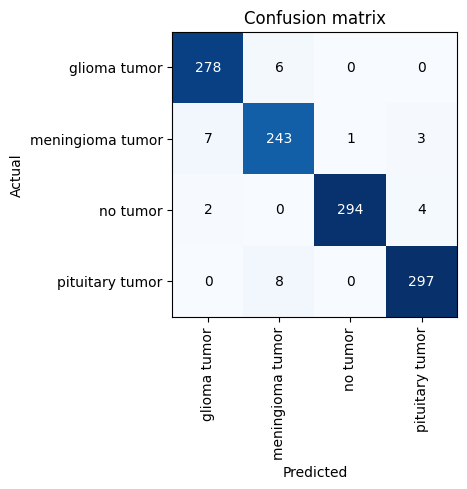

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

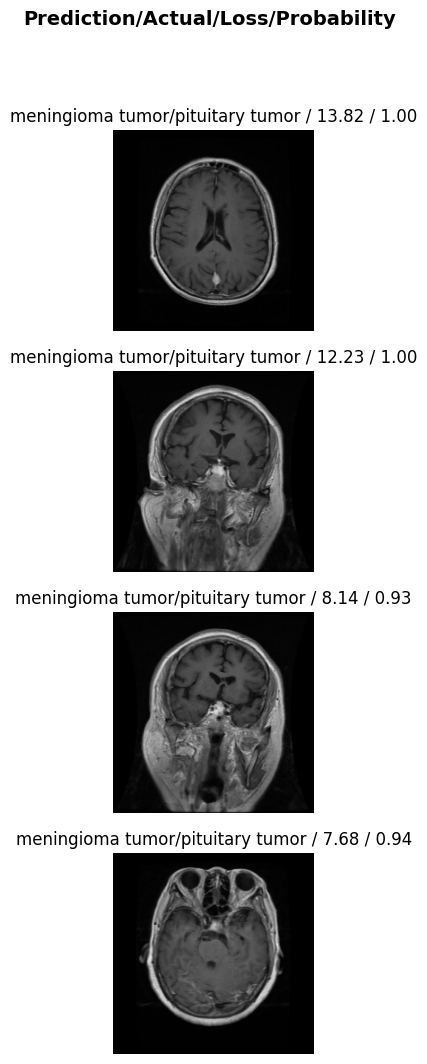

In [18]:
interp.plot_top_losses(4, nrows=4)